<a id="1"></a>
# <div style="padding:30px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color: #FF0000 ;letter-spacing:1px;overflow:hidden"><b> BIKE DEMAND EDA ANALYTICS PROJECT</b></div>

<div style="text-align: center;">
  <b>If you want to be the first to be informed about new projects, please do not forget to follow us - by Fatma Nur AZMAN</b><br>
  <a href="https://fatmanurazman.vercel.app/" style="color:#FF0000;">Fatmanurazman.com</a> | 
  <a href="https://www.linkedin.com/in/fatma-nur-azman/" style="color:#FF0000;">Linkedin</a> | 
  <a href="https://github.com/Fatma-Nur-Azman" style="color:#FF0000;">Github</a> | 
  <a href="https://www.kaggle.com/fnurazman" style="color:#FF0000;">Kaggle</a> | 
  <a href="https://public.tableau.com/app/profile/fatma.nur.azman/vizzes" style="color:#FF0000;">Tableau</a>
</div>


# <font color= #FF0000> <b> TABLE of CONTENTS </b></font>

- [UNDERSTANDING THE DATA](#understanding-the-data)
  - [Project Description](#project-description)
  - [About the Datasets](#about-the-datasets)
  - [Import The Libraries](#import-the-libraries)
  - [Performing Essential Statistical Analysis on the Dataset](#performing-essential-statistical-analysis-on-the-dataset)
- [DISTRIBUTION OF BIKE SHARES](#distribution-of-bike-shares)
  - [Seasonal Analysis](#seasonal-analysis)
  - [Distribution of Bike Shares by Season, Holiday, Weekend, and Weather Conditions](#distribution-of-bike-shares-by-season-holiday-weekend-and-weather-conditions)
- [CORRELATIONS AND RELATIONSHIPS](#correlations-and-relationships)
- [TIME SERIES ANALYSIS](#time-series-analysis)
- [TREND ANALYSIS](#trend-analysis)
  - [Bike shares by years](#bike-shares-by-years)
  - [Bike shares by years-months](#bike-shares-by-years-months)
  - [Bike shares by months](#bike-shares-by-months)
  - [Bike shares by week](#bike-shares-by-week)
  - [Bike shares by day](#bike-shares-by-day)
  - [Bike shares by hours](#bike-shares-by-hours)
  - [Bike shares by weekday/weekend](#bike-shares-by-weekday-weekend)
  - [Bike shares weather](#bike-shares-weather)
- [OVERALL CONCLUSION](#overall-conclusion)
- [RECOMMENDATIONS](#recommendations)


<a id="understanding-the-data"></a>
# <font color= #FF0000> <b> UNDERSTANDING THE DATA </b><font color= #FF0000>

<a id="project-description"></a>
<h2 align="left"><font color= #FF0000>Project Description:</font></h2>   

- Project Description: This analysis was conducted to analyze the stores' sharing data to evaluate performance and identify trends.
- About the Dataset: The dataset includes daily sales, number of visitors, and other performance metrics of various stores.

- **Purpose:** Welcome to "Bike Demand Visualization Project" . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.
    
<a id="about-the-datasets"></a>   
<h2 align="left"><font color= #FF0000>About the Datasets </font></h2>    
    
    
**Dataset Descriptions:** 'store.sharing.csv'

- **Content:** Change in the number of uses of London Bike shares according to seasons, air temperature, wind speed, etc.
- **Rows:** 17414    
- **Columns:** 10 
    - **timestamp**: Timestamp field for grouping the data
    - **cnt**: The count of a new bike shares
    - **t1**: Real temperature in C Daily return for JPMorgan Chase & Co.
    - **t2**: Temperature in C “feels like”
    - **hum**: humidity in percentage
    - **wind_speed**: wind speed in km/h
    - **weather_code**: category of the weather
          - "weather_code" category description:
             1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
             2 = scattered clouds / few clouds
             3 = Broken clouds
             4 = Cloudy
             7 = Rain/ light Rain shower/ Light rain
             10 = rain with thunderstorm
             26 = snowfall
             94 = Freezing Fog
    - **is_holiday**:boolean field - 1 holiday / 0 non holiday
    - **is_weekend**: boolean field - 1 if the day is weekend
    - **season**: category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.
    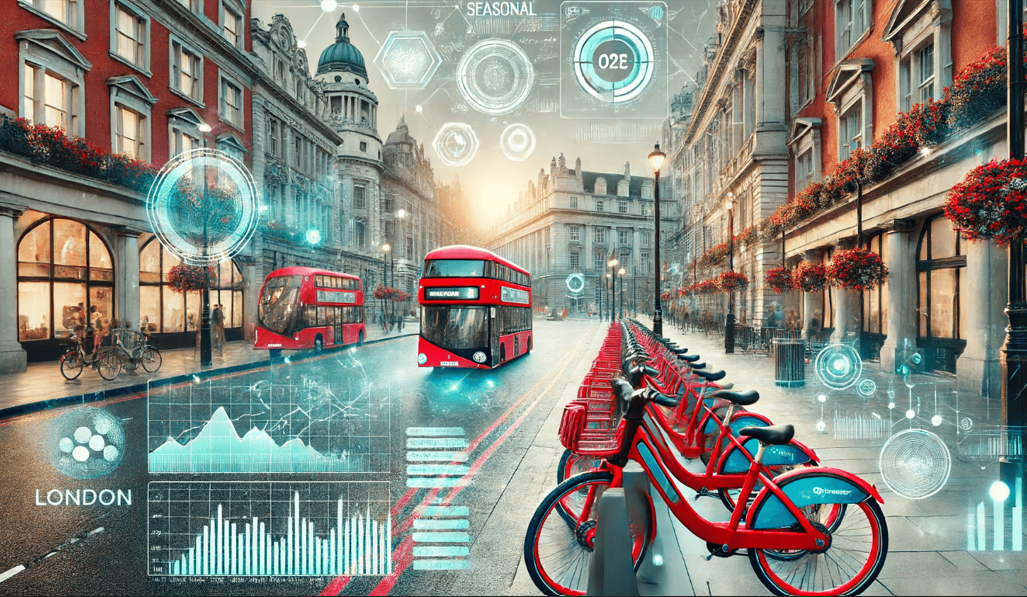

<a id="import-the-libraries"></a>
## <font color= #FF0000> <b>Import The Libraries</b><font color= #FF0000>

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib as mpl  
import matplotlib.pyplot as plt 
import seaborn as sns  
import missingno as mn
%matplotlib inline 
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df0 = pd.read_csv('store_sharing.csv')
df = df0.copy()

<a id="performing-essential-statistical-analysis-on-the-dataset"></a>
## <font color= #FF0000> <b>Performing Essential Statistical Analysis on the Dataset</b><font color= #FF0000>

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print("\nNumber of duplicate rows:", duplicate_rows)
    print("Duplicate Rows:")
    print(df[df.duplicated()])
else:
    print("\nNo duplicate rows found.")


No duplicate rows found.


In [7]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


<a id="distribution-of-bike-shares"></a>
# <font color= #FF0000> <b>DISTRIBUTION  OF BIKE SHARES</b><font color= #FF0000>

<a id="seasonal-analysis"></a>
## <font color= #FF0000> <b>Seasonal Analysis</b><font color= #FF0000>

In [10]:
df.groupby("season")["cnt"].agg([max,min,np.mean])

,max,min,mean
season,,,
0.0,5322,0,1103.831589
1.0,7860,12,1464.465238
2.0,5422,9,1178.954218
3.0,4415,10,821.729099


In [11]:
df.groupby("season")["wind_speed"].agg([max,min,np.mean])

,max,min,mean
season,,,
0.0,54.0,0.0,16.395482
1.0,43.5,0.0,15.783793
2.0,56.5,0.0,14.330428
3.0,56.0,0.0,17.127252


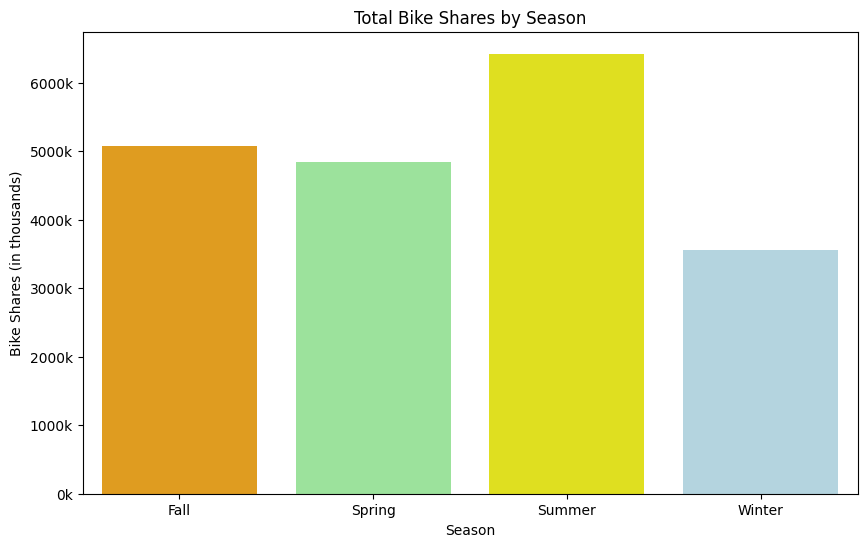

In [12]:
# Add season labels (0: Spring, 1: Summer, 2: Fall, 3: Winter)
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
df['season_label'] = df['season'].map(season_mapping)

# Calculate total bike shares by season
seasonal_data = df.groupby('season_label')['cnt'].sum().reset_index()

# Define colors for each season
season_colors = {'Spring': 'lightgreen', 'Summer': 'yellow', 'Fall': 'orange', 'Winter': 'lightblue'}

# Plotting bike sharing by season as a bar chart with y-axis labeled in thousands
plt.figure(figsize=(10, 6))
sns.barplot(x='season_label', y='cnt', data=seasonal_data, palette=season_colors)
plt.xlabel('Season')
plt.ylabel('Bike Shares (in thousands)')
plt.title('Total Bike Shares by Season')

# Update the y-axis labels to show numbers in thousands
y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(label/1000)}k' for label in y_labels])

plt.show()

<font color="#FF0000">Output: Overall Evaluation:</font>

**Seasonal Variation**: 
- Bike sharing fluctuates significantly based on seasonal changes, reaching its peak during summer and its lowest point during winter.

**Spring and Fall**: 

- These seasons also have high bike sharing rates, but not as high as summer.

**Winter**: 
- Bike sharing is at its lowest during this season, indicating that weather conditions greatly affect bike usage.

<a id="distribution-of-bike-shares-by-season-holiday-weekend-and-weather-conditions"></a>
## <font color= #FF0000> <b>Distribution of Bike Shares by Season, Holiday, Weekend, and Weather Conditions</b><font color= #FF0000>

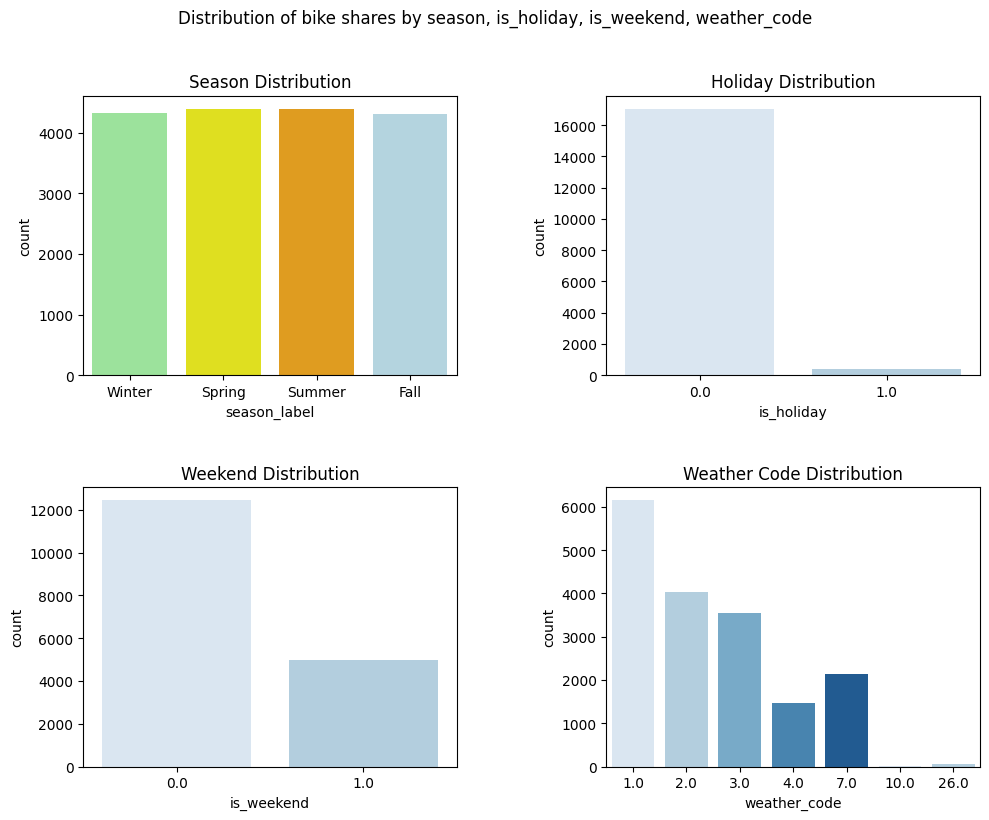

In [86]:
# Ensure that season mapping is consistent with the dataset
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
df['season_label'] = df['season'].map(season_mapping)

# Define colors for each season
season_colors = sns.color_palette(['lightgreen', 'yellow', 'orange', 'lightblue'])

blue_palette = sns.color_palette("Blues", n_colors=5)

plt.figure(figsize=(10, 8))
plt.suptitle("Distribution of bike shares by season, is_holiday, is_weekend, weather_code", y=1.02)

# Plot for season distribution
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='season_label', palette=season_colors)
plt.title('Season Distribution')

# Plot for is_holiday distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='is_holiday', palette=blue_palette)
plt.title('Holiday Distribution')

# Plot for is_weekend distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='is_weekend', palette=blue_palette)
plt.title('Weekend Distribution')

# Plot for weather_code distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='weather_code', palette=blue_palette)
plt.title('Weather Code Distribution')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
2 = scattered clouds / few clouds
3 = Broken clouds
4 = Cloudy
7 = Rain/ light Rain shower/ Light rain
10 = rain with thunderstorm
26 = snowfall
94 = Freezing Fog

<font color="#FF0000">Output: Overall Evaluation:</font>

**Seasonal Variation**: 
- Bike sharing fluctuates significantly based on seasonal changes. It reaches its highest level in summer and its lowest level in winter.

**Holiday and Weekend Effect**: 
- Bike sharing rates vary on holidays and weekends. Bike sharing is higher on weekends, while it decreases on holidays.

**Weather Effect**: 
- Weather conditions have a significant impact on bike sharing. Bike sharing increases in good weather conditions and decreases in bad weather conditions.

<a id="correlations-and-relationships"></a>
# <font color= #FF0000> <b>CORRELATIONS AND RELATIONSHIPS </b><font color= #FF0000>

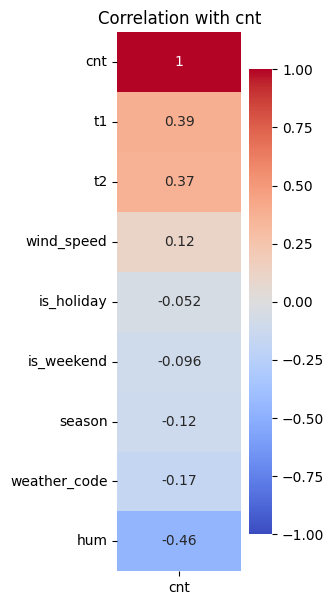

In [16]:
# Assuming 'cnt' is the target variable in the dataset
df_corr_cnt = df[['cnt', 't1', 't2', 'wind_speed', 'is_holiday', 'is_weekend', 'season', 'weather_code', 'hum']].corr()

# Creating the heatmap
plt.figure(figsize=(2, 7))
sns.heatmap(df_corr_cnt[['cnt']], annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation with cnt')
plt.show()

<font color="#FF0000">Output: Overall Evaluation:</font>

**Positive Relationships**:
- Temperature (t1 and t2) and wind speed have positive correlations with bike sharing. While warm weather increases bike usage, the impact of wind speed is lower.

**Negative Relationships**:
- Humidity, weather conditions, season, holidays, and weekends have negative correlations with bike sharing. High humidity and bad weather conditions significantly reduce bike sharing.

**Strategic Decisions**:
- Bike sharing services can develop strategies to encourage more bike usage in warm weather and low humidity conditions. Additionally, special measures can be taken to increase bike usage during bad weather conditions and high humidity.

<a id="time-series-analysis"></a>
# <font color= #FF0000> <b>TIME SERIES ANALYSIS</b><font color= #FF0000>

In [ ]:
# Time series analysis for column 'cnt'
plt.figure(figsize=(14, 7))
df[['cnt']].plot()
plt.title('Bike Sharing Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# 30-day moving average
df['cnt_MA'] = df['cnt'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['cnt_MA'], label='Count Moving Average')
plt.title('30-Day Moving Average of Bike Sharing')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

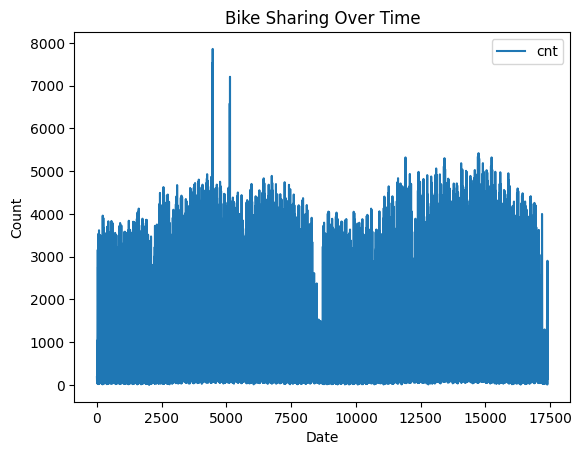

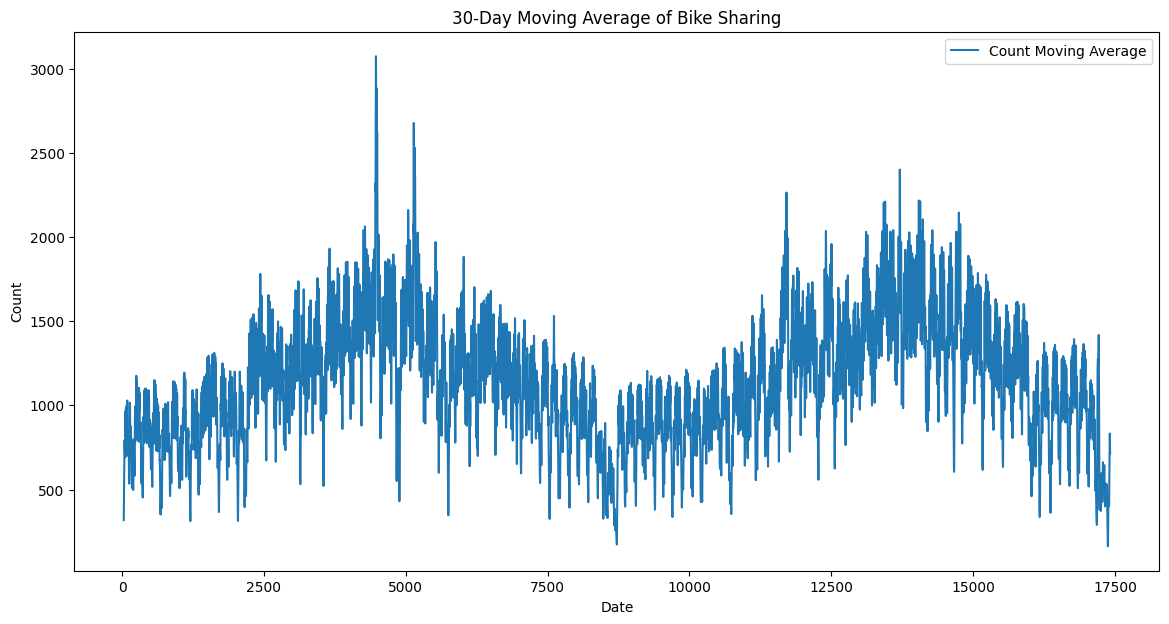

<font color="#FF0000">Output: Overall Evaluation:</font>

**Seasonal Variations**:
- There are significant seasonal fluctuations in bike sharing. There is an upward trend during the summer months, while there is a downward trend during the winter months. This indicates the impact of weather conditions on bike sharing.

**Noteworthy Periods**: 
- Sudden increases or decreases on specific dates could be due to special events, holidays, or weather conditions.

**Strategic Decisions**: 
- Bike sharing services can develop strategies by considering seasonal trends. For example, providing more bikes during the summer months and organizing special campaigns during the winter months.

<a id="trend-analysis"></a>
# <font color= #FF0000> <b>TREND ANALYSIS</b><font color= #FF0000>

In [19]:
df.timestamp = pd.to_datetime(df.timestamp)

In [20]:
df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_label,cnt_MA
timestamp,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,NaN
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,NaN
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,NaN
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,NaN
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,NaN


In [21]:
df["year-month"] = df.index.strftime("%Y-%m")
df["year"] =  df.index.year
df["month"] =  df.index.month
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["day_of_name"] = df.index.day_name()
df["hour"] = df.index.hour

<a id="bike-shares-by-years"></a>
## <font color= #FF0000> <b>Bike shares by years</b><font color= #FF0000>

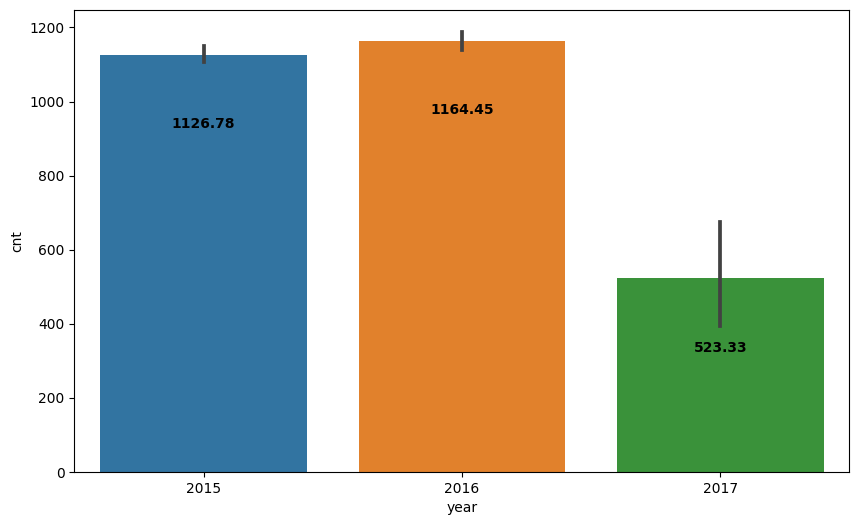

In [22]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x="year", y="cnt")
for p in ax.patches:
    ax.annotate(round(p.get_height(), 2), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,-50), textcoords='offset points',fontweight='bold')

<a id="bike-shares-by-years-months"></a>
## <font color= #FF0000> <b>Bike shares by years-months</b><font color= #FF0000>

In [23]:
df["year-month"] = df.index.strftime("%Y-%m")

In [24]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,season_label,cnt_MA,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,Winter,NaN,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,Winter,NaN,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,Winter,NaN,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,Winter,NaN,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,Winter,NaN,2015-01,2015,1,4,6,Sunday,4


In [25]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())
df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


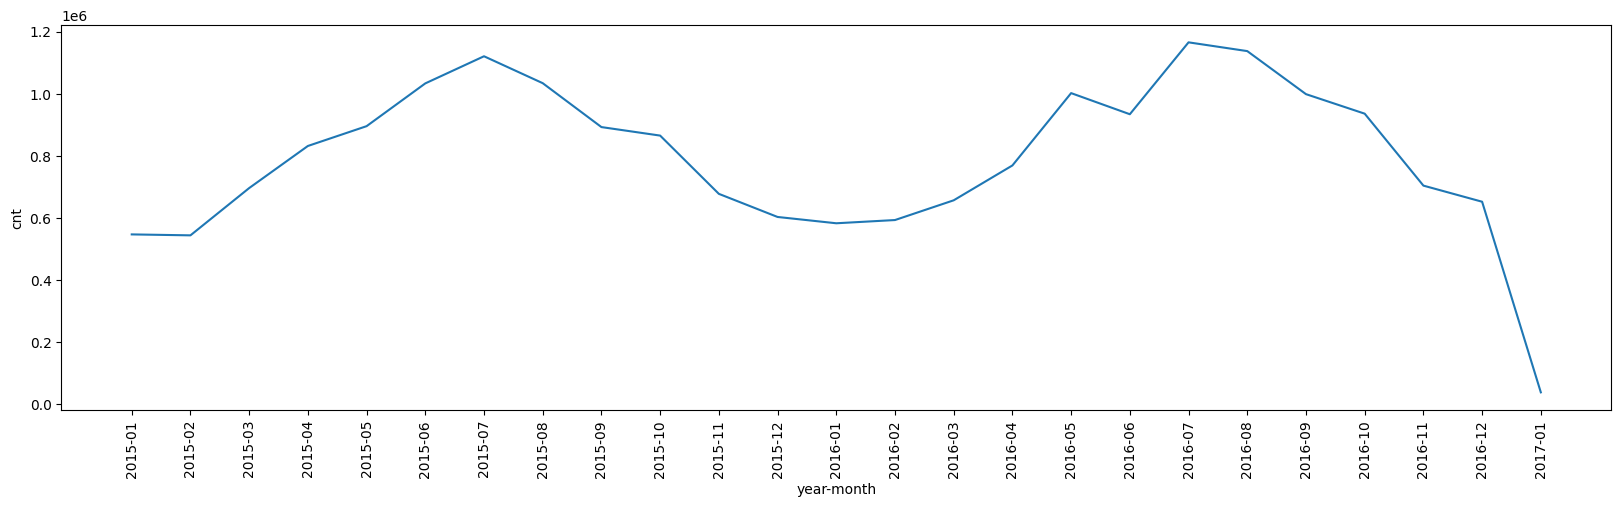

In [88]:
plt.figure(figsize=(20,5))
sns.lineplot(x="year-month",y="cnt", data = df_sum);
plt.xticks(rotation=90);

<font color="#FF0000">Output: Overall Evaluation:</font>

**Seasonal Fluctuations**:
- Summer Months (June, July, and August): There is a significant increase in bike sharing during the summer months. This indicates that warm weather boosts bike usage.
- Winter Months (December, January, and February): There is a noticeable decrease in bike sharing during the winter months. This suggests that cold weather negatively impacts bike usage.

**Annual Trends**:
- 2015 and 2016: There is a consistent pattern observed between 2015 and 2016. Bike sharing peaks during the summer months and declines during the winter months each year.
- 2016: The summer of 2016 shows the highest levels of bike sharing.

**Noteworthy Periods**:
- July and August 2016: These months show the highest levels of bike sharing. Special events or campaigns during this period may have increased bike usage.
- Early 2015 and Late 2016: These periods show the lowest levels of bike sharing. Poor weather conditions or other adverse factors may have contributed to the low numbers during these 

<a id="bike-shares-by-months"></a>
## <font color= #FF0000> <b>Bike shares by months</b><font color= #FF0000>

In [27]:
df_sum_2 = pd.DataFrame(df.groupby("month").cnt.sum())
df_sum_2

,cnt
month,
1,1166837
2,1136504
3,1352461
4,1600427
5,1897348
6,1967130
7,2286214
8,2171265
9,1891097


<Axes: xlabel='month', ylabel='cnt'>

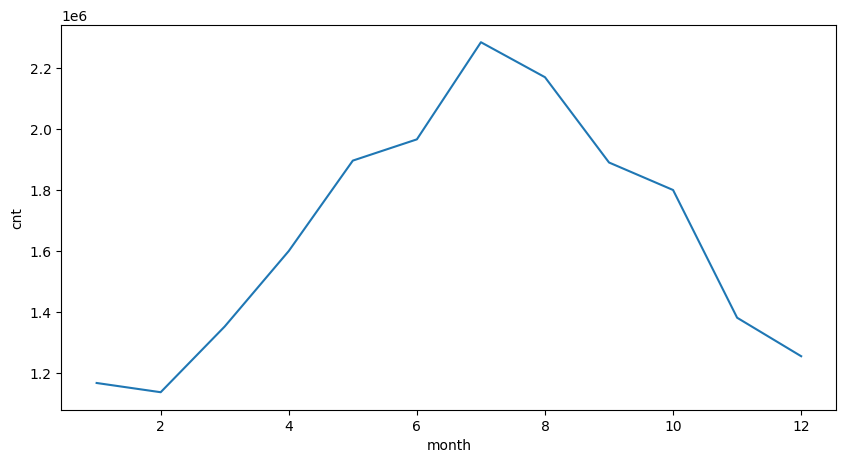

In [28]:
plt.figure(figsize=(10,5))
sns.lineplot(x="month",y="cnt", data = df_sum_2)

<font color="#FF0000">Output: Overall Evaluation:</font>

**Peak Usage Months**:
- The graph shows that bike sharing reaches its highest levels during the summer months, specifically in July. This peak suggests that warm weather conditions encourage more people to use bike-sharing services.

**Seasonal Increase**:
- From February to July, there is a consistent and noticeable increase in bike-sharing activity. This gradual rise corresponds with improving weather conditions and longer daylight hours, making biking more appealing.

**Decline in Late Year**:
- After the peak in July, there is a gradual decline in bike-sharing activity from August to December. The decline accelerates significantly towards the end of the year, indicating the impact of colder weather and possibly shorter daylight hours.

**Low Activity Periods**:
- The months of January and December exhibit the lowest levels of bike sharing. These months are typically associated with cold and potentially harsh weather conditions, which can deter people from using bikes.

<a id="bike-shares-by-week"></a>
## <font color= #FF0000> <b>Bike shares by week</b><font color= #FF0000>

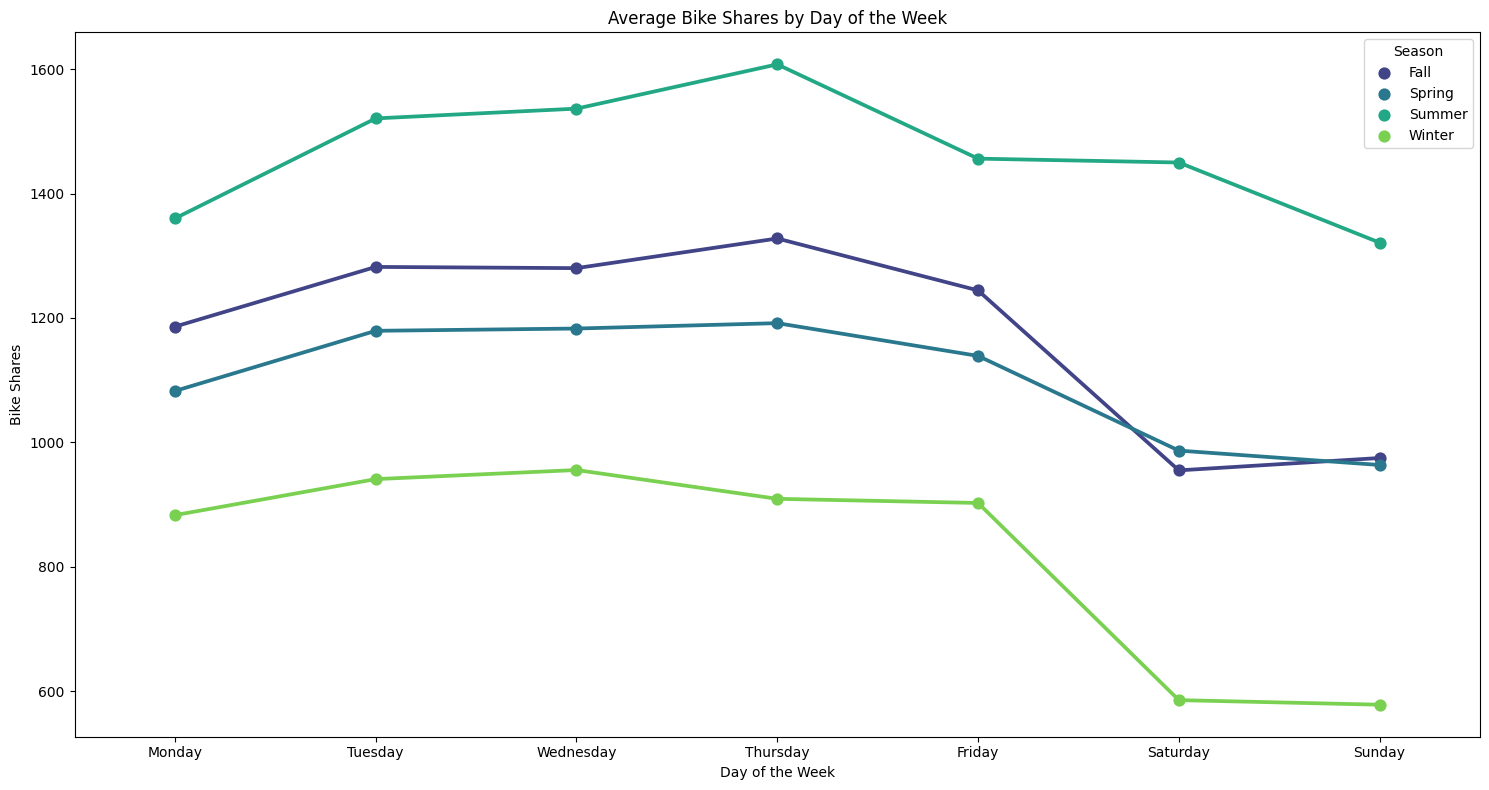

In [29]:
# Mapping the season codes to their respective labels
season_labels = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
df['season_label'] = df['season'].map(season_labels)

# Aggregating the data by season and day of the week
daily_seasonal_data = df.groupby(['season_label', 'day_of_week'])['cnt'].mean().reset_index()

# Define labels for the days of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Creating the pointplot for each season showing bike sharing over days of the week
plt.figure(figsize=(15, 8))

# Plot for each season separately
sns.pointplot(x='day_of_week', y='cnt', hue='season_label', data=daily_seasonal_data, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Bike Shares')
plt.title('Average Bike Shares by Day of the Week')

# Update the x-axis labels to show the days of the week
plt.xticks(ticks=range(7), labels=day_labels)

plt.legend(title='Season')
plt.tight_layout()
plt.show()


<font color="#FF0000">Output: Overall Evaluation:</font>

**Seasonal Variation**:
Summer: Shows the highest bike sharing rates throughout the week. Peaks around Friday and slightly dips on Saturday but remains high.

**Spring and Fall**: Have moderate bike sharing rates. They both show an increase from Monday to Friday, with a noticeable drop on Saturday and a slight increase again on Sunday.

**Winter**: Has the lowest bike sharing rates. Shows a more consistent pattern throughout the week, with a slight peak on Tuesday and a significant drop on Saturday and Sunday.

**Weekday vs. Weekend**:
- Weekdays (Monday to Friday): The bike sharing rates generally increase towards Friday, indicating higher usage during workdays, especially towards the end of the workweek.
- Weekends (Saturday and Sunday): There is a noticeable drop in bike sharing rates during the weekends across all seasons, with the sharpest decline observed in Winter.


<a id="bike-shares-by-day"></a>
## <font color= #FF0000> <b>Bike shares by day</b><font color= #FF0000> 

In [30]:
df_sum_3 = pd.DataFrame(df.groupby("day_of_month").cnt.sum())
df_sum_3

,cnt
day_of_month,
1,619537
2,600641
3,635968
4,658083
5,652522
6,697667
7,684249
8,696937
9,725225


<Axes: xlabel='day_of_month', ylabel='cnt'>

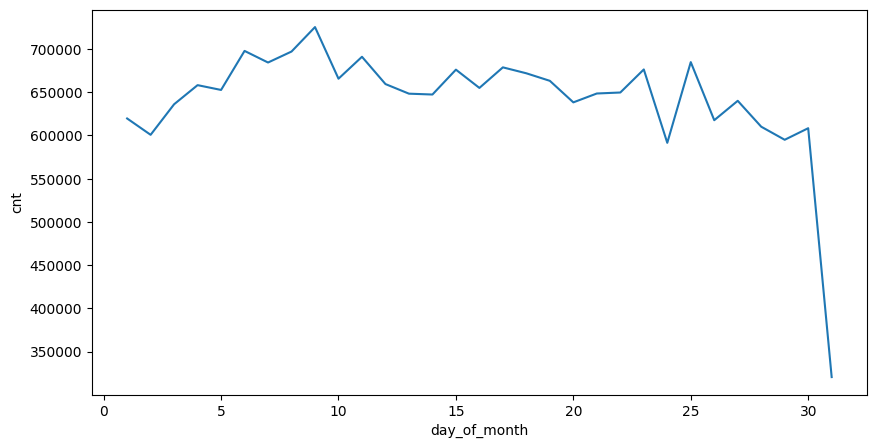

In [31]:
plt.figure(figsize=(10,5))
sns.lineplot(x="day_of_month",y="cnt", data = df_sum_3)

<a id="bike-shares-by-hours"></a>
## <font color= #FF0000> <b>Bike shares by hours</b><font color= #FF0000> 

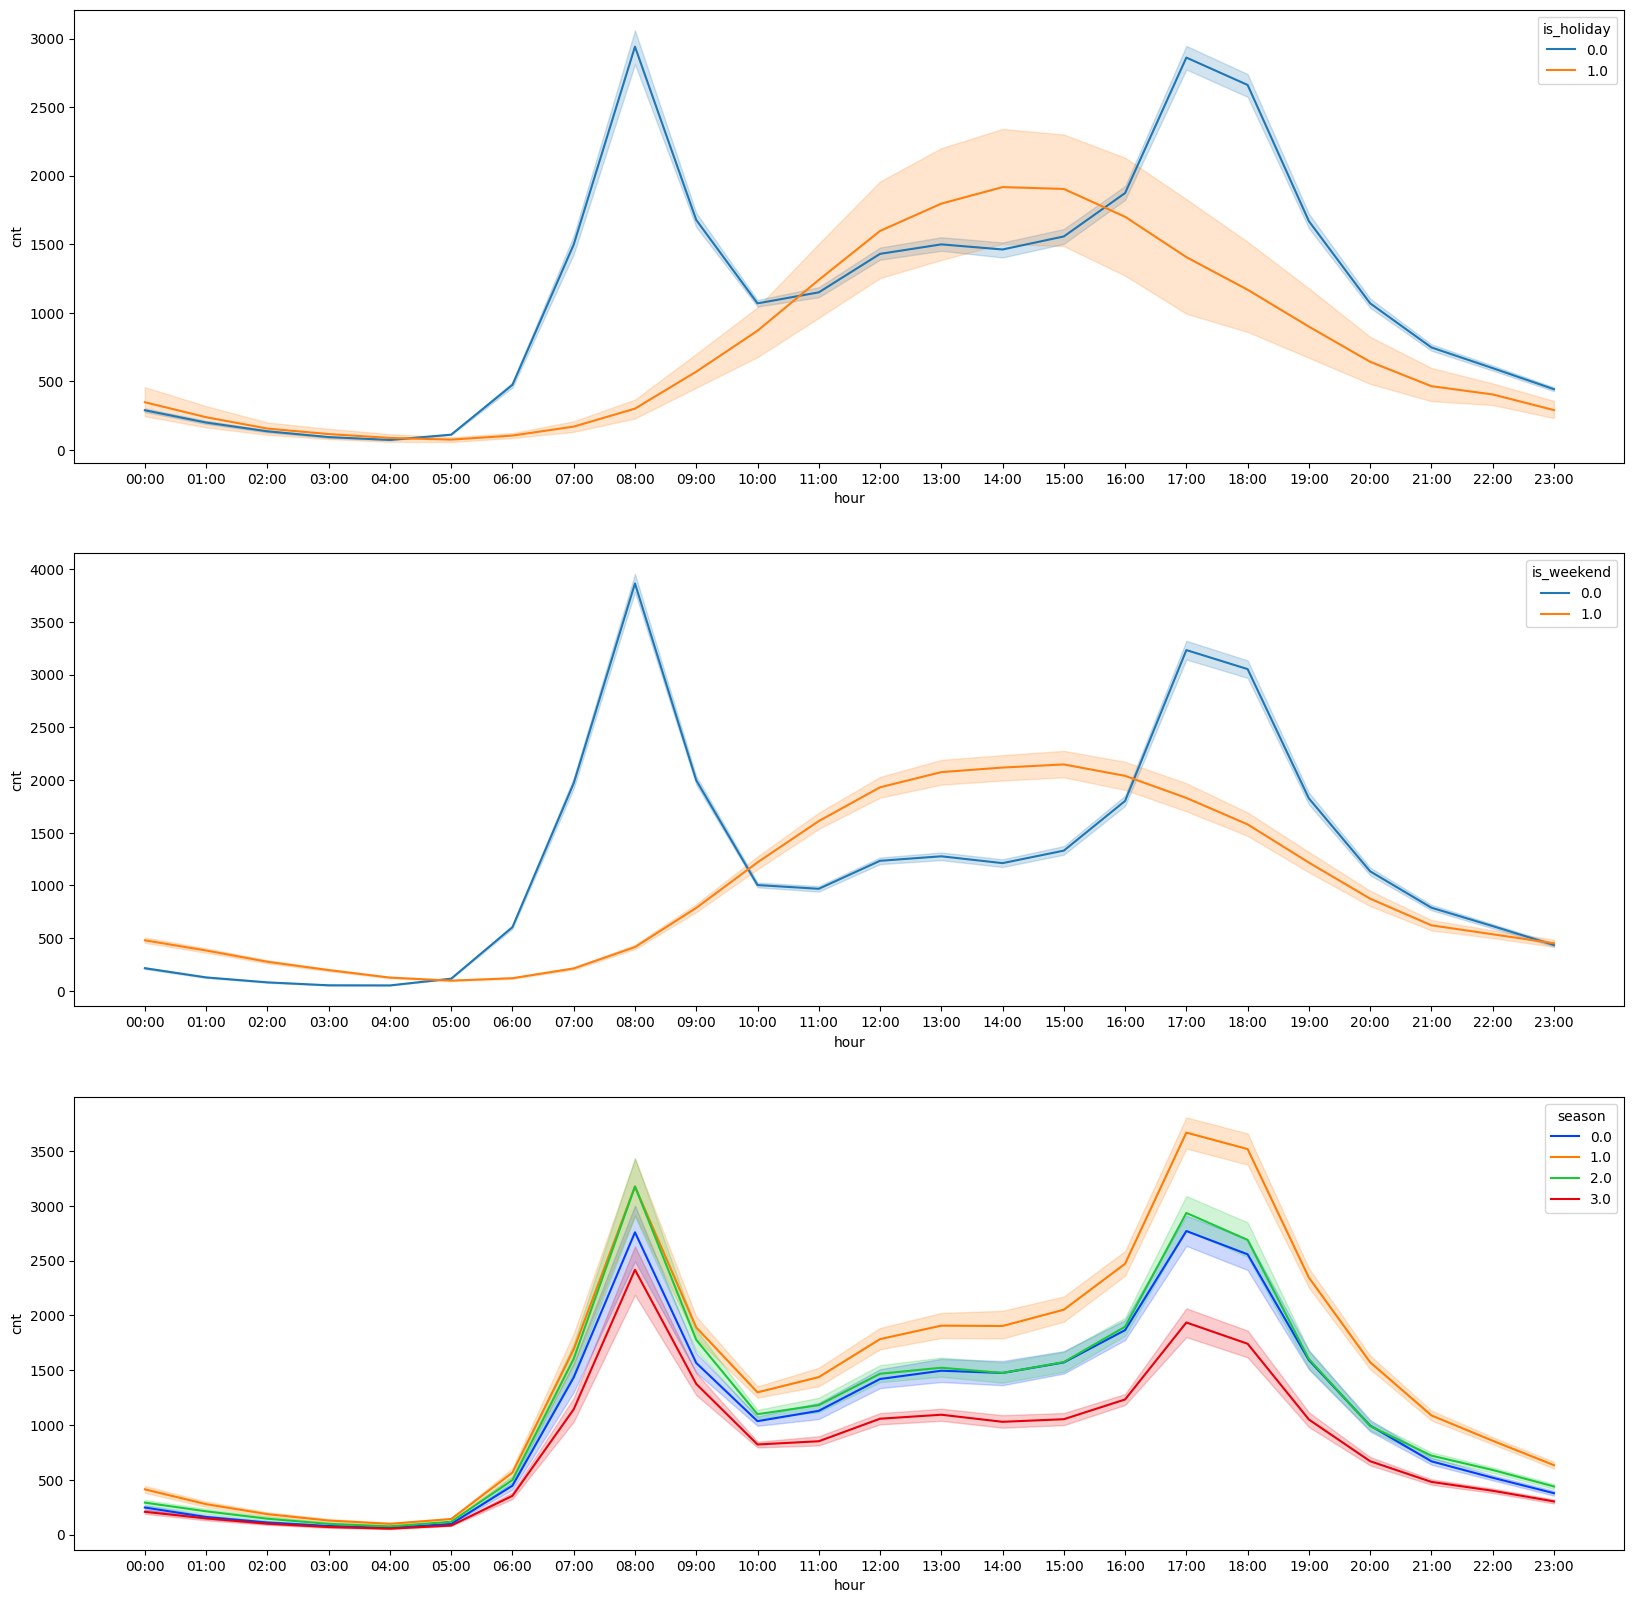

In [32]:
#df['hour'] = df['timestamp'].dt.hour
df['hour'] = df['hour'].apply(lambda x: '{:02d}:00'.format(x))
fig, ax = plt.subplots(3,1,figsize = (20,20))

ax[0] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "is_holiday", ax = ax[0])
ax[1] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "is_weekend", ax = ax[1])
ax[2] = sns.lineplot( data = df, x = "hour", y = "cnt", hue = "season",palette="bright", ax = ax[2])

<font color="#FF0000">Output: Overall Evaluation:</font>

**Holiday vs. Non-Holiday**:
- Non-Holiday: There are two distinct peaks in bike sharing usage. The first peak occurs around 8 AM, which likely corresponds to the morning commute. The second peak occurs around 5-6 PM, corresponding to the evening commute. These peaks indicate that bike sharing is heavily used for commuting purposes during non-holidays.
- Holiday: The usage pattern on holidays is more spread out throughout the day with a noticeable peak around midday, indicating more recreational or casual use rather than commuting.

**Weekend vs. Weekday**:
- Weekday: Similar to the non-holiday pattern, there are two distinct peaks during the morning (around 8 AM) and evening (around 5-6 PM), suggesting high usage for commuting.
- Weekend: The bike sharing usage on weekends shows a steady increase throughout the day, peaking around midday to early afternoon. This pattern suggests that bikes are used more for recreational activities rather than commuting.

<a id="bike-shares-by-weekday-weekend"></a>
## <font color= #FF0000> <b>Bike shares by weekday/weekend</b><font color= #FF0000> 

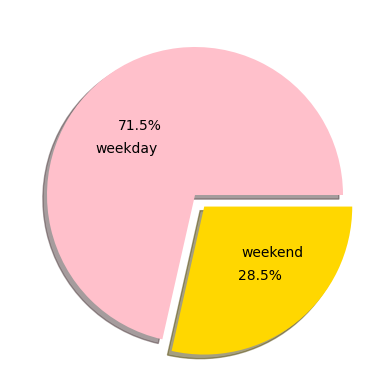

In [33]:
fig, ax = plt.subplots(figsize=(5,4)) 

colors_list = ["pink", "gold"]
explode_list = [0, 0.1]

ax.pie(df.is_weekend.value_counts().values,
       labels=["weekday", "weekend"],
       labeldistance=0.4,
       autopct="%.1f%%", shadow=True, 
       colors=colors_list, explode=explode_list)


plt.tight_layout()

plt.show()

<a id="bike-shares-weather"></a>
## <font color= #FF0000> <b>Bike shares weather</b><font color= #FF0000> 

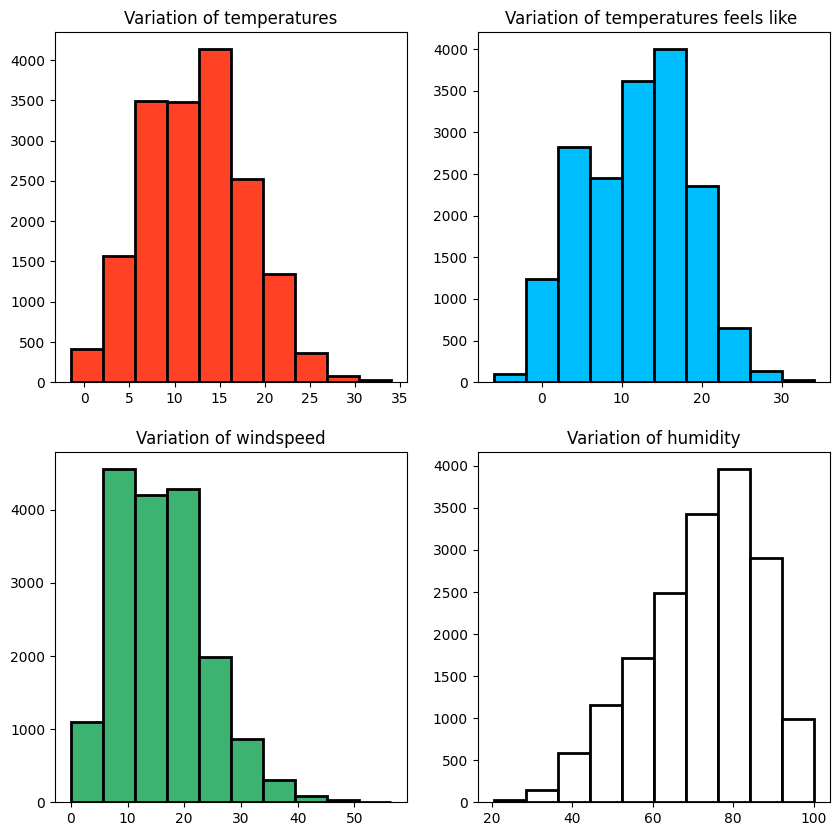

In [34]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="t1",data=df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temperatures")
axes[0,1].hist(x="t2",data=df,edgecolor="black",linewidth=2,color="deepskyblue")
axes[0,1].set_title("Variation of temperatures feels like ")
axes[1,0].hist(x="wind_speed",data=df,edgecolor="black",linewidth=2,color="mediumseagreen")
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="hum",data=df,edgecolor="black",linewidth=2,color="white")
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

<font color="#FF0000">Output: Overall Evaluation:</font>

**Temperature and Perceived Temperature**: 
- The alignment between actual and perceived temperatures being moderate indicates favorable conditions for bike sharing on most days.

**Wind Speed**: 
- With moderate wind speeds prevailing, the conditions are generally suitable for cycling.

**Humidity**: 
- Higher humidity levels could negatively impact bike sharing usage due to potential discomfort. Efforts to mitigate the effects of high humidity, such as providing shaded bike paths, could help maintain higher usage rates.

<a id="overall-conclusion"></a>
# <font color= #FF0000> <b> OVERALL CONCLUSION </b><font color= #FF0000>

**Seasonal Variations**:
- Peak Usage in Summer: Bike-sharing usage peaks during the summer months, indicating favorable weather conditions for cycling.
- Lowest Usage in Winter: The lowest usage occurs in winter, reflecting the impact of cold weather on outdoor activities.

**Weekly Patterns**:
- Increased Usage on Weekends: There is a noticeable increase in bike-sharing during weekends, suggesting recreational use.
- Consistent Usage During Weekdays: Weekday usage patterns are relatively consistent, likely driven by commuting.

**Daily Patterns**:
- Morning and Evening Peaks: There are clear peaks in usage during morning and evening hours, aligning with commuting times.
- Lower Midday Usage: Midday usage is lower, which may be influenced by work and school hours.

**Weather Impact**:
- Temperature and Usage: Moderate temperatures (around 15°C) are most common and favorable for bike-sharing.
- Wind Speed and Humidity: Moderate wind speeds (10-20 km/h) are conducive to cycling, while high humidity levels could deter usage.

<a id="recommendations"></a>
# <font color= #FF0000> <b> RECOMMENDATIONS</b><font color= #FF0000>

**Seasonal Promotions and Campaigns**:

- Summer Campaigns: Enhance marketing efforts and promotions during the summer to capitalize on peak usage periods.
- Winter Initiatives: Develop winter-specific initiatives, such as discounted rates, to encourage usage during low periods.

**Weekend and Holiday Strategies**:
- Weekend Events: Organize community events and group rides on weekends to further boost bike-sharing.
- Holiday Incentives: Offer special promotions or incentives on holidays to increase bike-sharing activities.

**Weather-Responsive Measures**:
- Real-Time Weather Updates: Integrate real-time weather updates into the bike-sharing app to inform users of optimal riding conditions.
- Comfort Enhancements: Provide shaded paths and hydration stations to make cycling more comfortable during high humidity and hot weather.

**User Engagement and Feedback**:

- User Surveys: Conduct regular surveys to gather user feedback on bike-sharing experiences and preferences.
- Community Engagement: Engage with local communities to understand their needs and tailor services accordingly.


By implementing these recommendations, bike-sharing services can enhance user satisfaction, optimize resource allocation, and increase overall usage, leading to a more successful and sustainable bike-sharing program.

<a id="1"></a>
# <div style="padding:30px;color:white;margin:0;font-size:100%;font-family:Verdana;text-align:center;display:fill;border-radius:15px;background-color: #FF0000 ;letter-spacing:1px;overflow:hidden"><b> THANK YOU</b></div>

<br>
<div style="text-align: center;">
  <b>If you want to be the first to be informed about new projects, please do not forget to follow us - by Fatma Nur AZMAN</b><br>
  <a href="https://fatmanurazman.vercel.app/">Fatmanurazman.com</a> | 
  <a href="https://www.linkedin.com/in/fatma-nur-azman/">Linkedin</a> | 
  <a href="https://github.com/Fatma-Nur-Azman">Github</a> | 
  <a href="https://www.kaggle.com/fnurazman">Kaggle</a> | 
  <a href="https://public.tableau.com/app/profile/fatma.nur.azman/vizzes">Tableau</a>
</div>